# Customer Segmentation   (clustering)

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [8]:
# Dataset: E-commerce customer data
import pandas as pd

data = pd.read_csv("data.csv")
data[0:6]

,Email,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611Jeffreychester, MN 672...",FloralWhite,12.03,34.48,5.49,637.10


In [9]:
# Preprocessing
# Dropping irrelevant columns (Email, Address, Avatar) for clustering
df = data.drop(columns=['Email', 'Address', 'Avatar'])

# Normalizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']])

# Check if there are any missing values
print(df.isnull().sum())

# Handling missing values if any (fill or drop, based on requirement)
df.fillna(df.mean(), inplace=True)

Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64


# K=means Clustering

C:\Users\aditi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aditi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


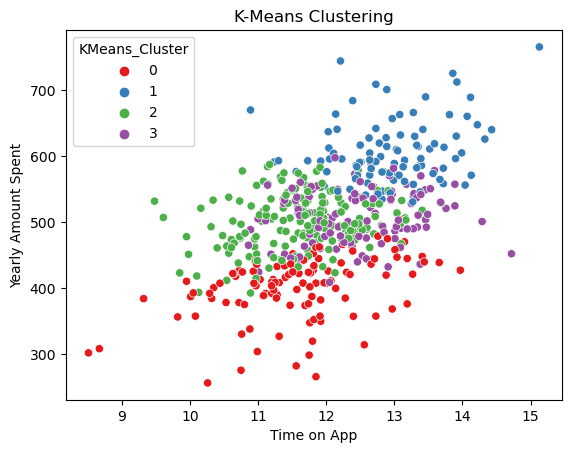

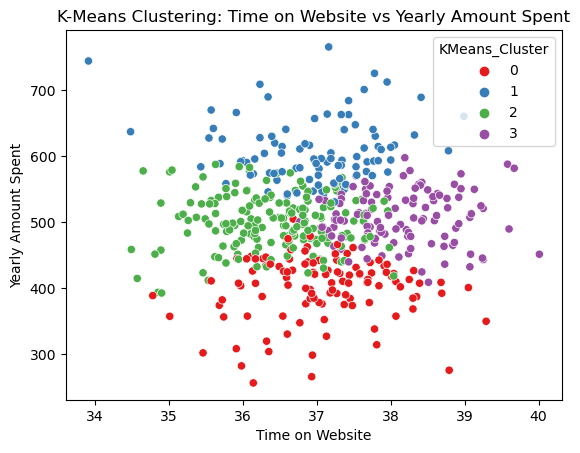

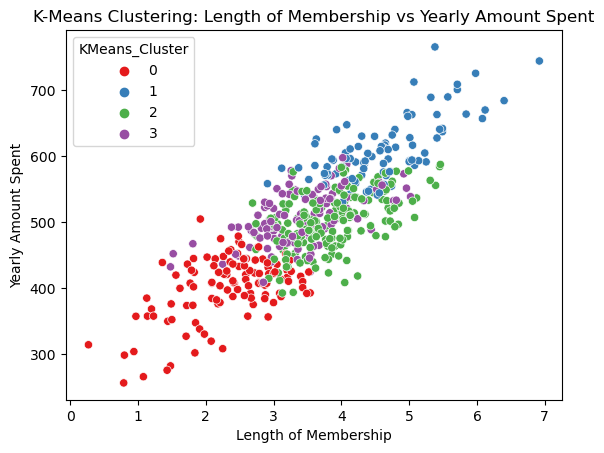

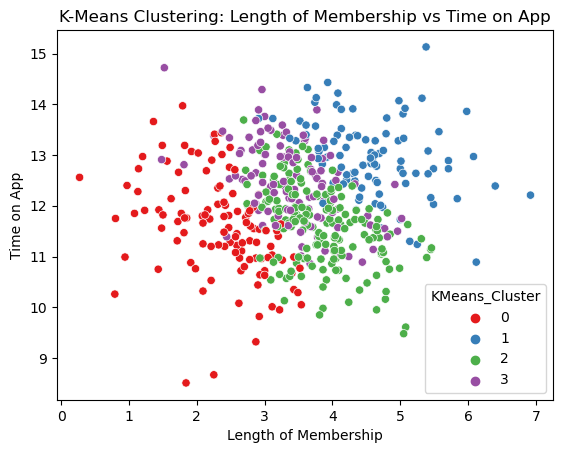

In [10]:
# K-means clustering to identify customer segments
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize the clusters with respect to key features
sns.scatterplot(x=df['Time on App'], y=df['Yearly Amount Spent'], hue=df['KMeans_Cluster'], palette='Set1')
plt.title('K-Means Clustering')
plt.show()

# Plot 1: Time on Website vs Yearly Amount Spent
sns.scatterplot(x=df['Time on Website'], y=df['Yearly Amount Spent'], hue=df['KMeans_Cluster'], palette='Set1')
plt.title('K-Means Clustering: Time on Website vs Yearly Amount Spent')
plt.show()

# Plot 2: Length of Membership vs Yearly Amount Spent
sns.scatterplot(x=df['Length of Membership'], y=df['Yearly Amount Spent'], hue=df['KMeans_Cluster'], palette='Set1')
plt.title('K-Means Clustering: Length of Membership vs Yearly Amount Spent')
plt.show()

# Plot 3: Length of Membership vs Time on App
sns.scatterplot(x=df['Length of Membership'], y=df['Time on App'], hue=df['KMeans_Cluster'], palette='Set1')
plt.title('K-Means Clustering: Length of Membership vs Time on App')
plt.show()

# Hierarchical Clustering

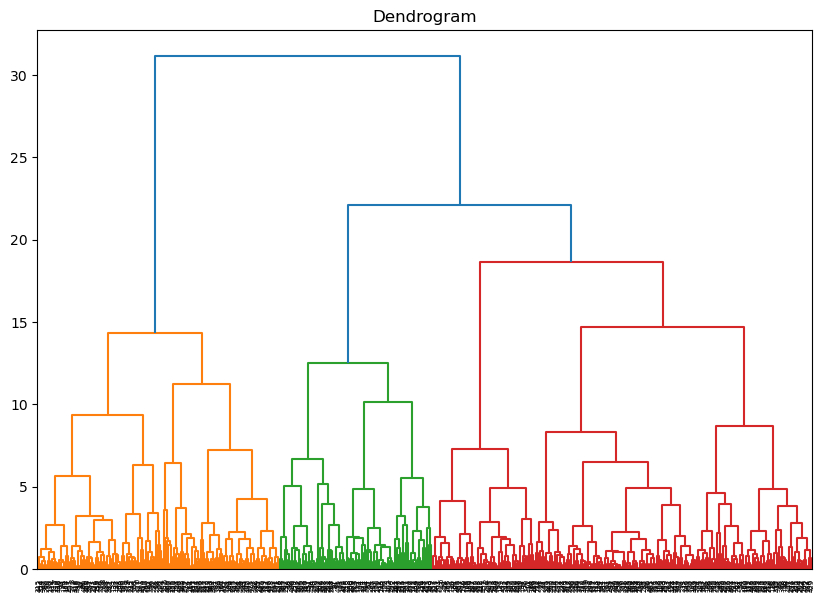

In [11]:
# Hierarchical Clustering (Agglomerative) to identify customer segments
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward', metric='euclidean')
df['Hierarchical_Cluster'] = agg_clustering.fit_predict(df_scaled)

# Compute linkage matrix
Z = linkage(df_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.show()

KMeans Cluster Profiles:
                Time on App  Time on Website  Length of Membership  \
KMeans_Cluster                                                       
0                 11.574123        37.066842              2.338070   
1                 12.964043        36.958723              4.583511   
2                 11.628989        36.422135              3.822191   
3                 12.441053        38.134737              3.411754   

                Yearly Amount Spent  Hierarchical_Cluster  
KMeans_Cluster                                             
0                        401.215439              1.394737  
1                        606.810957              1.074468  
2                        500.442303              1.348315  
3                        507.014035              0.456140  


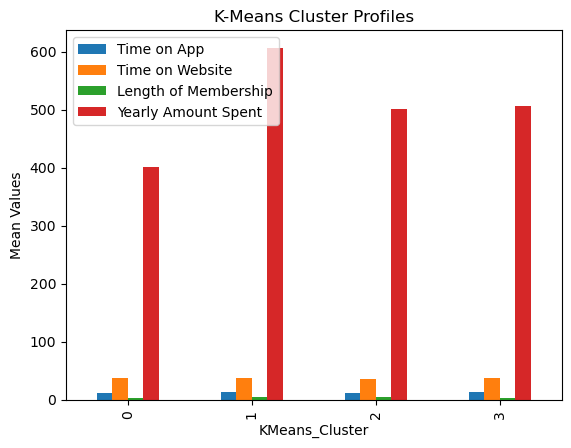

Hierarchical Cluster Profiles:
                      Time on App  Time on Website  Length of Membership  \
Hierarchical_Cluster                                                       
0                       12.448492        37.408827              3.077542   
1                       12.618269        36.663013              4.354808   
2                       11.113131        36.830808              2.541919   
3                       11.051212        37.399697              4.315152   

                      Yearly Amount Spent  KMeans_Cluster  
Hierarchical_Cluster                                       
0                              484.832458        2.094972  
1                              577.949936        1.506410  
2                              395.813939        0.444444  
3                              507.974848        2.090909  


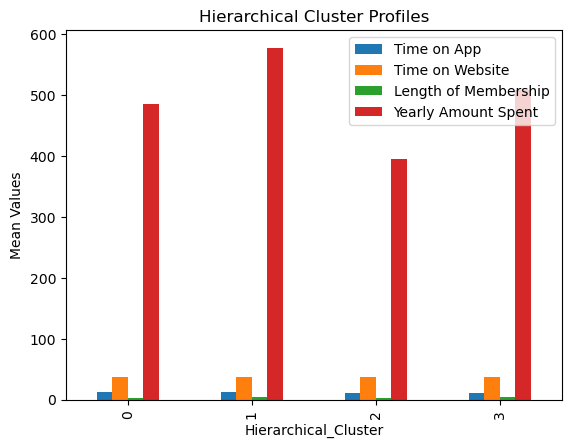

In [12]:
# Profiling customer segments based on demographics and behavior
# Grouping by KMeans clusters and analyzing the mean of each group
cluster_profile_kmeans = df.groupby('KMeans_Cluster').mean()
print("KMeans Cluster Profiles:")
print(cluster_profile_kmeans)

# Visualizing the profiles
cluster_profile_kmeans[['Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']].plot(kind='bar')
plt.title('K-Means Cluster Profiles')
plt.ylabel('Mean Values')
plt.show()

# Grouping by Hierarchical clusters and analyzing the mean of each group
cluster_profile_hierarchical = df.groupby('Hierarchical_Cluster').mean()
print("Hierarchical Cluster Profiles:")
print(cluster_profile_hierarchical)

# Visualizing the profiles
cluster_profile_hierarchical[['Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']].plot(kind='bar')
plt.title('Hierarchical Cluster Profiles')
plt.ylabel('Mean Values')
plt.show()

In [14]:
# Building predictive models for each segment
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Let's use KMeans clustering results for segmentation
for cluster in df['KMeans_Cluster'].unique():
    cluster_data = df[df['KMeans_Cluster'] == cluster]
    
    # Define features and target
    X = cluster_data[['Time on App', 'Time on Website', 'Length of Membership']]
    y = cluster_data['Yearly Amount Spent']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Build a Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    print(f"Cluster {cluster} - RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"Cluster {cluster} - R2 Score: {r2_score(y_test, y_pred)}")

Cluster 3 - RMSE: 27.922344561251276
Cluster 3 - R2 Score: 0.4791875954749433
Cluster 0 - RMSE: 29.31729898757959
Cluster 0 - R2 Score: -0.10316706199449333
Cluster 2 - RMSE: 25.521642223678274
Cluster 2 - R2 Score: 0.6158251532029817
Cluster 1 - RMSE: 30.918627961001334
Cluster 1 - R2 Score: 0.5589376805297059
